In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import RMSprop, Adam
from matplotlib import pyplot as plt
import numpy as np

Para la primer ecuación diferencial que es $xy' + y = x^2$ con $y(0)=0$.
Usamos la 

In [33]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape2:
                 tape2.watch(x)
                 y_pred = self(x, training=True)
             dy = tape2.gradient(y_pred, x) 
             x_o = tf.zeros((batch_size,1)) 
             y_o = self(x_o,training=True) 
             eq = x * dy + y_pred - x**2 * tf.math.cos(x) 
             ic = 0.0
             loss = self.mse(0.0, eq) + self.mse(y_o,ic)

         grads = tape.gradient(loss, self.trainable_variables)
         self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
         self.loss_tracker.update_state(loss)
         return {"loss": self.loss_tracker.result()}

In [34]:
model = ODEsolver()
model.add(Dense(30, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "od_esolver_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 30)                60        
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
 dense_18 (Dense)            (None, 1)                 2         
                                                                 
Total params: 93 (372.00 Byte)
Trainable params: 93 (372.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


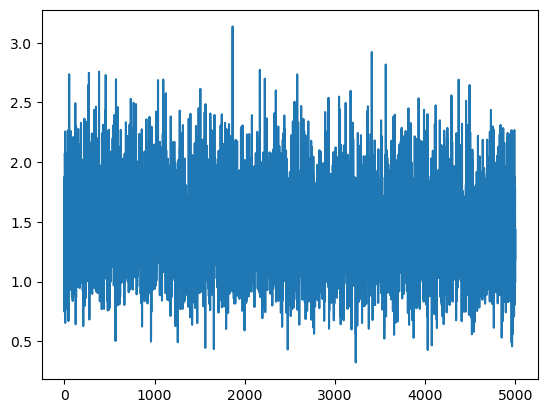

In [40]:
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['loss'])
x=tf.linspace(-5,5,500)
history = model.fit(x,epochs=5000,verbose=0)
plt.plot(history.history["loss"])

16/16 [==============================] - 0s 3ms/step


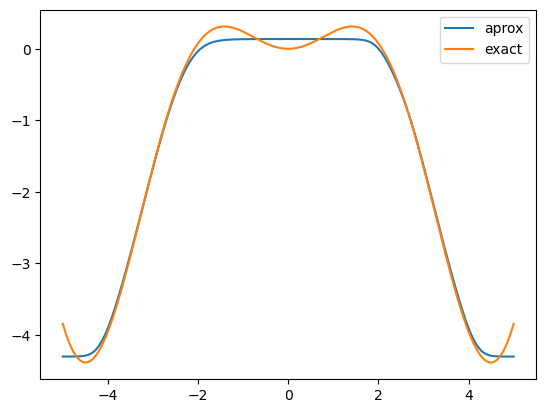

In [41]:
x_testv = tf.linspace(-5,5,500)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,((x**2 - 2)/x) * tf.sin(x) + 2*tf.cos(x),label="exact")
plt.legend()
plt.show()


Esta va a ser distinta

In [42]:
model = ODEsolver()
model.add(Dense(50, activation='tanh', input_shape=(1,)))
model.add(Dense(30, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))

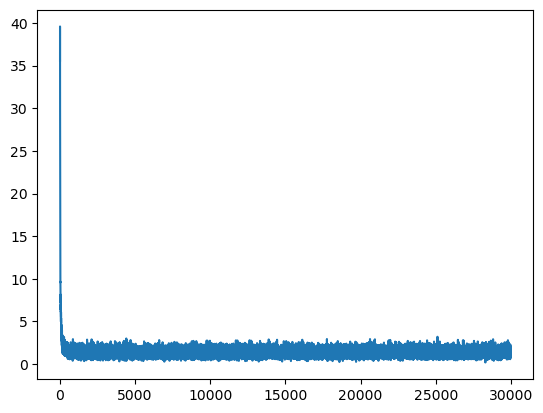

In [43]:
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['loss'])
x=tf.linspace(-5,5,500)
history = model.fit(x,epochs=30000,verbose=0)
plt.plot(history.history["loss"])

16/16 [==============================] - 0s 2ms/step


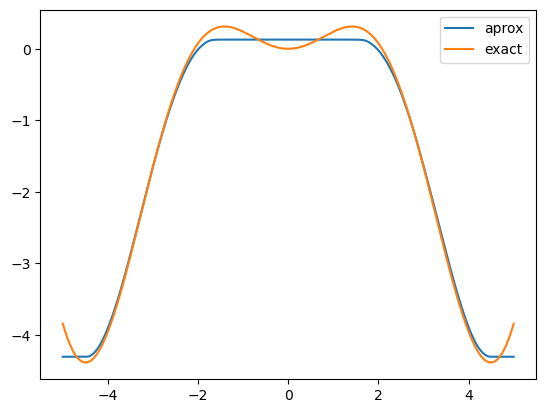

In [44]:
x_testv = tf.linspace(-5,5,500)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,((x**2 - 2)/x) * tf.sin(x) + 2*tf.cos(x),label="exact")
plt.legend()
plt.show()

# Segunda ecuación
Para la segunda ecuación diferencial que es $\frac{d^2y}{dx^2} = -y$ con $y(0)=0$ y $y(0)=-0.5$.


In [46]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape1:
                 with tf.GradientTape() as tape2:
                     tape2.watch(x)
                     y_pred = self(x, training=True)
                 dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             ddy = tape1.gradient(dy, x) #segunda derivada del modelo con respecto a entradas x

         with tf.GradientTape() as tape3:
             tape3.watch(x_o)
             y_o = self(x_o,training=True) #valor del modelo en en x_0
         dy_o = tape3.gradient(y_o, x_o) #derivada del modelo en en x_0

         eq = ddy + y_pred #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
         ic1 = 1. 
         ic2 = -0.5
         loss = self.mse(0., eq) + self.mse(y_o,ic1) + self.mse(y_o,ic2)

         grads = tape.gradient(loss, self.trainable_variables)
         if None in grads:
             print("Gradient for some variable is None")
         else:
             self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
         self.loss_tracker.update_state(loss)
         return {"loss": self.loss_tracker.result()}

In [47]:
model = ODEsolver()
model.add(Dense(20, activation='tanh', input_shape=(1,)))
model.add(Dense(1, activation='tanh'))
model.add(Dense(1))

In [48]:
model.compile(optimizer=Adam(learning_rate=0.001),metrics=['loss'])
x=tf.linspace(-5,5,500)
history = model.fit(x,epochs=500,verbose=0)

ValueError: in user code:

    File "C:\Users\el_he\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\el_he\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\el_he\anaconda3\lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\el_he\AppData\Local\Temp\ipykernel_5800\204780517.py", line 32, in train_step
        eq = ddy + y_pred #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno

    ValueError: None values not supported.


In [ ]:
x_testv = tf.linspace(-2,2,500)
a=model.predict(x_testv)
plt.plot(x_testv,a,label="aprox")
plt.plot(x_testv,np.cos(x_testv),label="exact")
plt.legend()
plt.show()

Clase:

In [ ]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mse = tf.keras.losses.MeanSquaredError()

    @property
    def metrics(self):
      return [self.loss_tracker]

    def train_step(self, data):
         batch_size = tf.shape(data)[0]
         min = tf.cast(tf.reduce_min(data),tf.float32)
         max = tf.cast(tf.reduce_max(data),tf.float32)
         x = tf.random.uniform((batch_size,1), minval=min, maxval=max)

         x_o = tf.zeros((batch_size,1)) #valor de x en condicion inicial x_0=0

         with tf.GradientTape() as tape:
             with tf.GradientTape() as tape1:
                     tape2.watch(x)
                     y_pred = self(x, training=True)
                 dy = tape2.gradient(y_pred, x) #derivada del modelo con respecto a entradas x
             ddy = tape1.gradient(dy, x) #segunda derivada del modelo con respecto a entradas x

         eq = ddy + y_pred #Ecuacion diferencial evaluada en el modelo. Queremos que sea muy pequeno
         ic1 = 1. 
         ic2 = -0.5
         loss = self.mse(0., eq) + self.mse(y_o,ic1) + self.mse(dy_o,ic2)

         grads = tape.gradient(loss, self.trainable_variables)
         if None in grads:
             print("Gradient for some variable is None")
         else:
             self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
         self.loss_tracker.update_state(loss)
         return {"loss": self.loss_tracker.result()}